In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import roc_auc_score
sns.set_style("darkgrid")

In [2]:
%%javascript
$('.nbp-app-bar').toggle()

<IPython.core.display.Javascript object>

# Read and Split the Data

In [3]:
weather=pd.read_csv('weather2.csv')
readings=pd.read_csv('readings.csv')
chicago=pd.merge(readings, weather, on='Date').drop('Date', axis=1);
print(chicago.shape)
print(chicago.columns)
chicago.head()

(8475, 16)
Index(['NumMosquitos', 'Month', 'Year', 'DayRunner', 'Virus', 'pipiens',
       'restuans', 'bad_block', 'spray', 'Tmax', 'Tmin', 'rainy', 'dry',
       'Dry_Wet_Diff', 'Slowdown', 'Speedy'],
      dtype='object')


,NumMosquitos,Month,Year,DayRunner,Virus,pipiens,restuans,bad_block,spray,Tmax,Tmin,rainy,dry,Dry_Wet_Diff,Slowdown,Speedy
0,1,5,2007,149,0,1,1,1,0,88,65,0,0,1,1,0
1,1,5,2007,149,0,0,1,1,0,88,65,0,0,1,1,0
2,1,5,2007,149,0,0,1,1,0,88,65,0,0,1,1,0
3,1,5,2007,149,0,1,1,1,0,88,65,0,0,1,1,0
4,4,5,2007,149,0,0,1,1,0,88,65,0,0,1,1,0


In [4]:
# Split the data
X = chicago.drop(['Virus'], axis=1)
y = chicago['Virus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)
X_train.shape # Notice the number of rows in the training set. This should stay constant.

(6780, 15)

# Model 1. KNN classifier 

#### fit on the training, predict on the testing data

In [5]:
# train the model
neighs = KNeighborsClassifier(n_neighbors=7)
knn_model = neighs.fit(X_train, y_train)

In [6]:
# The crossvalidiation score scores our performance on the training data. 
scores = cross_val_score(knn_model, X_train, y_train, cv=5)
np.mean(scores), np.std(scores) # This is the mean of the 5 cv scores, plus its standard dev.

(0.94130019369398921, 0.0042064138816886526)

In [7]:
# Predict the y values on the testing data.
y_hat = knn_model.predict(X_test)

#### Score my model

In [8]:
# Set up some empty lists, so we can compare our models at the end
acc=[]
sens=[]
spec=[]
roc=[]

In [9]:
# There are two different ways to get the accuracy score, which is our primary metric:
modscore=100*(knn_model.score(X_test, y_test))
accuracy=100*metrics.accuracy_score(y_test, y_hat)
acc.append(accuracy)
print(modscore)
print(accuracy)

94.395280236
94.395280236


In [10]:
# A confusion matrix tells us our false positives and false negatives:
mat = confusion_matrix(y_test, y_hat)
print (mat)

[[1588   18]
 [  77   12]]


In [11]:
# Let's interpret that.
tn, fp, fn, tp = mat.ravel()
sensitivity = 100*tp/(tp+fn)
specificity=100*tn/(tn+fp)
sens.append(sensitivity)
spec.append(specificity)

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 13.4831460674
specificity: 98.8792029888


In [12]:
# Our ROC-AUC score measures the trade-off between specificity and sensitivity
roc_score=100*roc_auc_score(y_test, y_hat)
roc.append(roc_score)
print(roc_score)

56.1811745281


# Model 2. Logistic Classifier

#### fit on the training, predict on the testing data

In [13]:
# train the model
logit = LogisticRegression()
log_model=logit.fit(X_train, y_train)

In [14]:
# The crossvalidiation score scores our performance on the training data. 
scores = cross_val_score(logit, X_train, y_train, cv=5)
np.mean(scores), np.std(scores) # This is the mean of the 5 cv scores, plus its standard dev.

(0.94852483390590625, 0.0011893849134528571)

In [15]:
# Predict the y values on the testing data.
y_hat = log_model.predict(X_test)

In [16]:
# Check out the coefficients
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(log_model.coef_))], axis = 1)
coefficients

,0,0
0,NumMosquitos,0.010601
1,Month,-0.138463
2,Year,-0.006651
3,DayRunner,0.022406
4,pipiens,0.904211
5,restuans,-0.199205
6,bad_block,1.527731
7,spray,1.049445
8,Tmax,-0.017001
9,Tmin,0.079186


#### Score my model

In [17]:
# There are two different ways to get the accuracy score, which is our primary metric:
modscore=100*(log_model.score(X_test, y_test))
accuracy=100*metrics.accuracy_score(y_test, y_hat)
acc.append(accuracy)
print(modscore)
print(accuracy)

94.8672566372
94.8672566372


In [18]:
# A confusion matrix tells us our false positives and false negatives:
mat = confusion_matrix(y_test, y_hat)
print (mat)

[[1604    2]
 [  85    4]]


In [19]:
# Let's interpret that.
tn, fp, fn, tp = mat.ravel()
sensitivity = 100*tp/(tp+fn)
specificity=100*tn/(tn+fp)
sens.append(sensitivity)
spec.append(specificity)

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 4.49438202247
specificity: 99.8754669988


In [20]:
# Our ROC-AUC score measures the trade-off between specificity and sensitivity
roc_score=100*roc_auc_score(y_test, y_hat)
roc.append(roc_score)
print(roc_score)

52.1849245106


# Model 3. Random Forest Classifier

#### Instantiate and Fit the Model

In [21]:
dt = RandomForestClassifier()
tree_model=dt.fit(X_train, y_train)

In [22]:
# The crossvalidiation score scores our performance on the training data. It's quite high (but we have imbalance)
scores = cross_val_score(tree_model, X_train, y_train, cv=5)
np.mean(scores), np.std(scores) # This is the mean of the 5 cv scores, plus its standard dev.

(0.93112102312420075, 0.0023110648108094424)

In [23]:
# Predict the y values on the testing data.
y_hat = tree_model.predict(X_test)

#### Score the model

In [24]:
# ACCURACY
accuracy=100*metrics.accuracy_score(y_test, y_hat)
acc.append(accuracy)
print(accuracy)

93.8053097345


In [25]:
# A confusion matrix tells us our false positives and false negatives:
mat = confusion_matrix(y_test, y_hat)
print (mat)

[[1569   37]
 [  68   21]]


In [26]:
# Let's interpret that.
tn, fp, fn, tp = mat.ravel()
sensitivity = 100*tp/(tp+fn)
specificity=100*tn/(tn+fp)
sens.append(sensitivity)
spec.append(specificity)

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 23.595505618
specificity: 97.696139477


In [27]:
# Our ROC-AUC score measures the trade-off between specificity and sensitivity
roc_score=100*roc_auc_score(y_test, y_hat)
roc.append(roc_score)
print(roc_score)

60.6458225475


In [28]:
# compute the feature importances
importances = tree_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in tree_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.711397)
2. feature 3 (0.071125)
3. feature 9 (0.040982)
4. feature 5 (0.039254)
5. feature 8 (0.034364)
6. feature 4 (0.024188)
7. feature 1 (0.018869)
8. feature 2 (0.018414)
9. feature 6 (0.014496)
10. feature 7 (0.008545)
11. feature 12 (0.006351)
12. feature 10 (0.005832)
13. feature 14 (0.002954)
14. feature 11 (0.001905)
15. feature 13 (0.001322)


In [29]:
feat_imp=pd.DataFrame(importances, index=X_test.columns, columns=['importance'])
feat_imp

,importance
NumMosquitos,0.711397
Month,0.018869
Year,0.018414
DayRunner,0.071125
pipiens,0.024188
restuans,0.039254
bad_block,0.014496
spray,0.008545
Tmax,0.034364
Tmin,0.040982


In [30]:
top15=pd.DataFrame(feat_imp['importance'].sort_values(ascending=False))

Text(0,0.5,'Feature Importance')

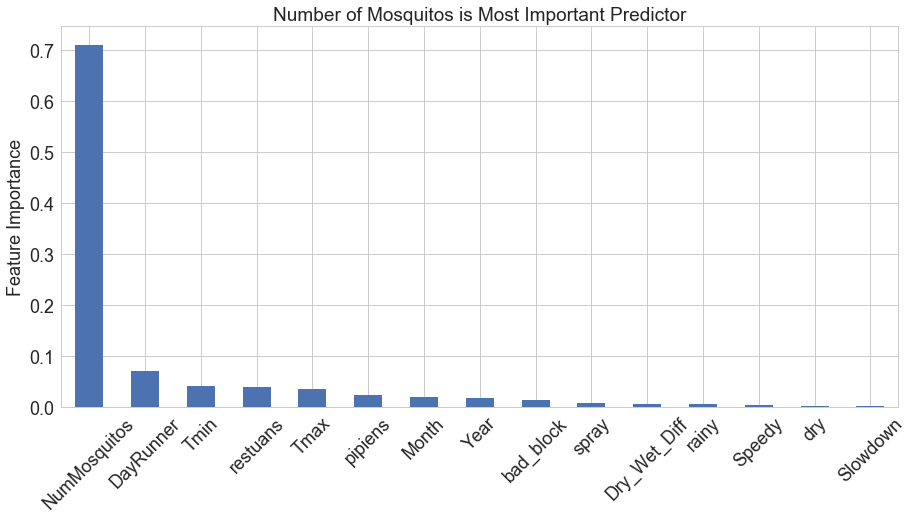

In [31]:
sns.set(style="whitegrid", color_codes=True)
ax = top15.plot(kind='bar', legend=False, fontsize=18, figsize=(15, 7))
plt.xticks(rotation = 45,  fontsize=18)
plt.title('Number of Mosquitos is Most Important Predictor',  fontsize=19)
plt.yticks(rotation = 0,  fontsize=18)
plt.ylabel('Feature Importance', rotation=90,  fontsize=18) 

# Compare Models

In [32]:
# Recap those scores for me, please.
models=['KNN', 'Logistic', 'Random Forest']
cols=['Model', 'Accuracy', 'Sensitivity', 'Specificity', 'ROC-AUC']
print(acc)
print(sens)
print(spec)
print(roc)

[94.395280235988196, 94.86725663716814, 93.805309734513273]
[13.48314606741573, 4.4943820224719104, 23.59550561797753]
[98.879202988792031, 99.875466998754675, 97.696139476961392]
[56.181174528103874, 52.184924510613293, 60.64582254746945]


In [33]:
# Show me that in a table:
model_scores=pd.DataFrame(list(map(list, zip(models, acc, sens, spec, roc))), columns=cols)
model_scores

,Model,Accuracy,Sensitivity,Specificity,ROC-AUC
0,KNN,94.395280,13.483146,98.879203,56.181175
1,Logistic,94.867257,4.494382,99.875467,52.184925
2,Random Forest,93.805310,23.595506,97.696139,60.645823


Text(0,0.5,'Score')

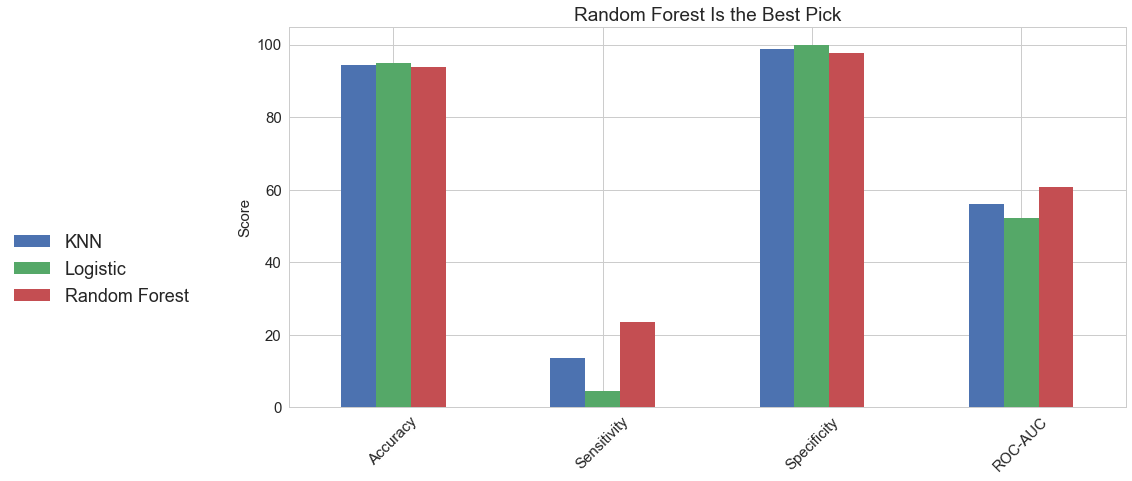

In [34]:
# Make it pretty. 
ax = model_scores.set_index('Model').T.plot(kind='bar', legend=False, fontsize=12, figsize=(15, 7))
ax.legend(loc=1, fontsize=18, bbox_to_anchor=(-0.1, 0.5))
plt.xticks(rotation = 45,  fontsize=15)
plt.title('Random Forest Is the Best Pick',  fontsize=19)
plt.yticks(rotation = 0,  fontsize=15)
plt.ylabel('Score', rotation=90,  fontsize=15)  